# Table of Contents
* [Run OCR service](#Run-OCR-service)
* [Run directly](#Run-directly)
* [End](#End)


This notebook compares contains early tests of the tableparse service

In [20]:
import numpy as np
import pandas as pd
import scipy.stats as st

import cv2
import pprint
import pickle
import json
import requests
import io

from IPython.display import display
import PIL.Image as Image

# Run OCR service

In [4]:
def query_vision_tp(image_url):
    api_entry_point = 'http://0.0.0.0:8200/v1/tableparse'
    header = {'Content-Type': 'application/json'}
    request_data = {
        'url': image_url,
    }
    json_data = json.dumps(request_data)
    response = requests.post(api_entry_point, data=json_data, headers=header)
    print(response.content)
    json_response = json.loads(response.content.decode())
    if as_json:
        response = json_response
    return response

In [5]:
def query_vision_tp_bytes(image):
    api_entry_point = 'http://0.0.0.0:8200/v1/tableparse'
    header = {'Content-Type': 'application/json'}
    request_data = {
        'image': image,
    }
    json_data = json.dumps(request_data)
    response = requests.post(api_entry_point, data=json_data, headers=header)
#     print(response.content)
    json_response = json.loads(response.content.decode())
    if json_response:
        response = json_response
    return response

In [6]:
ex_1 = '/Users/schwenk/wrk/tableparse/vision-tableparse/examples/example_1.png'
ex_2 = '/Users/schwenk/wrk/tableparse/vision-tableparse/examples/sight-word-bingo.png'

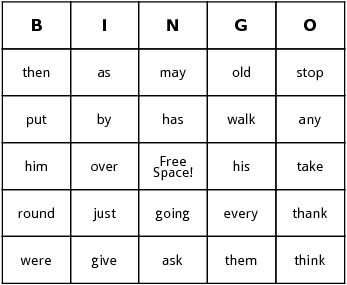

In [7]:
b64_image = base64.b64encode(open(ex_2, 'rb').read())
WImage(filename=ex_2)

In [68]:
%load_ext snakeviz

In [69]:
%snakeviz tp_response = query_vision_tp_bytes(b64_image)

 
*** Profile stats marshalled to file u'/var/folders/89/qnfd36sx1rs246whpmhw3gh00000gq/T/tmpHrw0f4'. 


In [8]:
%%prun 
tp_response = query_vision_tp_bytes(b64_image)

In [9]:
tp_response['columns']

[[{u'rectangle': [{u'x': 3, u'y': 3}, {u'x': 69, u'y': 47}], u'value': u'B'},
  {u'rectangle': [{u'x': 3, u'y': 50}, {u'x': 69, u'y': 94}],
   u'value': u'then'},
  {u'rectangle': [{u'x': 3, u'y': 97}, {u'x': 69, u'y': 141}],
   u'value': u'put'},
  {u'rectangle': [{u'x': 3, u'y': 144}, {u'x': 69, u'y': 188}],
   u'value': u'him'},
  {u'rectangle': [{u'x': 3, u'y': 191}, {u'x': 69, u'y': 234}],
   u'value': u'round'},
  {u'rectangle': [{u'x': 3, u'y': 237}, {u'x': 69, u'y': 281}],
   u'value': u'Were'}],
 [{u'rectangle': [{u'x': 72, u'y': 3}, {u'x': 137, u'y': 47}], u'value': u''},
  {u'rectangle': [{u'x': 72, u'y': 50}, {u'x': 137, u'y': 94}],
   u'value': u'as'},
  {u'rectangle': [{u'x': 72, u'y': 97}, {u'x': 137, u'y': 141}],
   u'value': u'by'},
  {u'rectangle': [{u'x': 72, u'y': 144}, {u'x': 137, u'y': 188}],
   u'value': u'Over'},
  {u'rectangle': [{u'x': 72, u'y': 191}, {u'x': 137, u'y': 234}],
   u'value': u'just'},
  {u'rectangle': [{u'x': 72, u'y': 237}, {u'x': 137, u'y': 281

In [63]:
tp_response['rows']

[[{u'rectangle': [{u'x': 3, u'y': 3}, {u'x': 69, u'y': 47}], u'value': u'B'},
  {u'rectangle': [{u'x': 72, u'y': 3}, {u'x': 137, u'y': 47}], u'value': u''},
  {u'rectangle': [{u'x': 140, u'y': 3}, {u'x': 205, u'y': 47}],
   u'value': u'N'},
  {u'rectangle': [{u'x': 208, u'y': 3}, {u'x': 274, u'y': 47}],
   u'value': u'G'},
  {u'rectangle': [{u'x': 277, u'y': 3}, {u'x': 343, u'y': 47}],
   u'value': u'O'}],
 [{u'rectangle': [{u'x': 3, u'y': 50}, {u'x': 69, u'y': 94}],
   u'value': u'then'},
  {u'rectangle': [{u'x': 72, u'y': 50}, {u'x': 137, u'y': 94}],
   u'value': u'as'},
  {u'rectangle': [{u'x': 140, u'y': 50}, {u'x': 205, u'y': 94}],
   u'value': u'may'},
  {u'rectangle': [{u'x': 208, u'y': 50}, {u'x': 274, u'y': 94}],
   u'value': u'old'},
  {u'rectangle': [{u'x': 277, u'y': 50}, {u'x': 343, u'y': 94}],
   u'value': u'stop'}],
 [{u'rectangle': [{u'x': 3, u'y': 97}, {u'x': 69, u'y': 141}],
   u'value': u'put'},
  {u'rectangle': [{u'x': 72, u'y': 97}, {u'x': 137, u'y': 141}],
   u'va

# Run directly

In [15]:
def detect(image_path):
    import ai2.vision.tableparse
    import cv2
    print(image_path)
    image = Image.open(image_path)
    #resized = image.resize(tuple(map(lambda y: round(y * float(ratio)), image.size)), PIL.Image.LANCZOS)
    #resized.save(image_path + ".tmp-resized.png")
    #image_path = image_path + ".tmp-resized.png"
    #image = Image.open(image_path)
    print(image.size)

    colors = [
            (255, 0, 0),
            (0, 255, 0),
            (0, 0, 255),
            (255, 255, 0),
            (0, 255, 255),
            (255, 0, 255),

            (128, 0, 0),
            (0, 128, 0),
            (0, 0, 128),
            (128, 128, 0),
            (0, 128, 128),
            (128, 0, 128),

            (255, 128, 0),
            (0, 128, 255),
            (128, 255, 0),
            (0, 255, 128),
            (255, 0, 128),
            (128, 0, 255)
    ]
    rows, columns = ai2.vision.tableparse.detect(image)
    from pprint import pprint
    color_counter = 0

    image_1 = cv2.imread(image_path)
    print("rows *** %s" % len(rows))
    for row in rows:
        print("cells %s" % len(row.cells))
        pprint(row.to_JSON())
        color = colors[color_counter]
        print('|'.join(list(map(lambda c: c.value, row.cells))))
        for cell in row.cells:
            cv2.rectangle(image_1, (cell.start_x + 1, cell.start_y + 1), (cell.end_x - 1, cell.end_y - 1), color=color, thickness=2)
        color_counter += 1

    image_2= cv2.imread(image_path)
    color_counter = 0
    print("columns *** %s" % (len(columns)))
    for row in columns:
        print("cells %s" % len(row.cells))
        #pprint(row.to_JSON())
        color = colors[color_counter]
        print('|'.join(list(map(lambda c: c.value, row.cells))))
        for cell in row.cells:
            cv2.rectangle(image_2, (cell.start_x + 1, cell.start_y + 1), (cell.end_x - 1, cell.end_y - 1), color=color, thickness=2)
        color_counter += 1

    return Image.fromarray(image_1), Image.fromarray(image_2)

In [16]:
i1, i2 = detect('./examples/example_1.png')

./examples/example_1.png
(587, 218)
rows *** 4
cells 3
[{'empty': False,
  'rectangle': [{'x': 29, 'y': 19}, {'x': 205, 'y': 60}],
  'value': 'Date'},
 {'empty': False,
  'rectangle': [{'x': 205, 'y': 19}, {'x': 380, 'y': 60}],
  'value': 'Sunrise'},
 {'empty': False,
  'rectangle': [{'x': 380, 'y': 19}, {'x': 555, 'y': 60}],
  'value': 'Sunset'}]
Date|Sunrise|Sunset
cells 3
[{'empty': False,
  'rectangle': [{'x': 29, 'y': 60}, {'x': 205, 'y': 101}],
  'value': 'February 8'},
 {'empty': False,
  'rectangle': [{'x': 205, 'y': 60}, {'x': 380, 'y': 101}],
  'value': '7:00 a.m.'},
 {'empty': False,
  'rectangle': [{'x': 380, 'y': 60}, {'x': 555, 'y': 101}],
  'value': '5:20 p.m.'}]
February 8|7:00 a.m.|5:20 p.m.
cells 3
[{'empty': False,
  'rectangle': [{'x': 29, 'y': 101}, {'x': 205, 'y': 142}],
  'value': 'February 15'},
 {'empty': False,
  'rectangle': [{'x': 205, 'y': 101}, {'x': 380, 'y': 142}],
  'value': '6:50 a.m.'},
 {'empty': False,
  'rectangle': [{'x': 380, 'y': 101}, {'x': 555

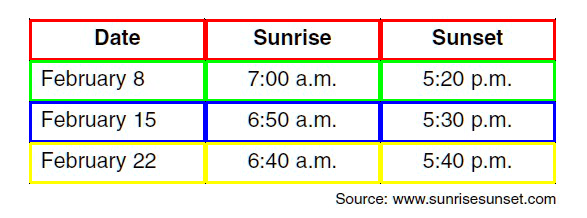

In [17]:
i1

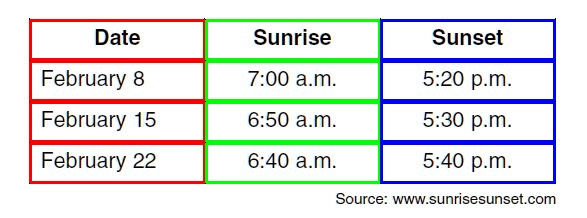

In [18]:
i2

# End

In [357]:
def display_page(raw_page_img, page_layout):
    page_png_stream, y_height = make_png_stream(raw_page_img)
    page_img = make_open_cv_img(page_png_stream)
    for box in page_layout._objs:
        lr, ul = get_bbox_tuple(box, y_height)
        try:
            # print box.get_text()
            pass
        except AttributeError:
            pass
        cv2.rectangle(page_img, ul, lr, color=random_color(), thickness=2)
    display(Image.fromarray(page_img, 'RGB'))


def draw_pdf_with_boxes(book_file, page_range, word_margin=0.1, line_overlap=0.5, char_margin=2.0,
                        line_margin=0.5, boxes_flow=0.5):
    if page_range:
        page_range = map(lambda x: x - 1, page_range)
        suffix = '[{}-{}]'.format(page_range[0], page_range[1])
        raw_multi_pdf = WImage(filename=book_file + suffix)
    else:
        raw_multi_pdf = WImage(filename=book_file)
        
    doc_page_layouts = make_page_layouts(book_file, page_range,
                                         line_overlap,
                                         char_margin,
                                         line_margin,
                                         word_margin,
                                         boxes_flow)
    page_images = raw_multi_pdf.sequence
    for page_n in range(len(page_images)):
        display_page(page_images[page_n], doc_page_layouts[page_n])

def random_color():
    import random
    return random.randint(0,255), random.randint(0,255), random.randint(0,255)